# Классификация sms сообщений

In [1]:
%matplotlib inline
# служебная команда для отображения графиков

В этом задании мы будем использовать данные SMS Spam collection из репозитория UCI.
Файл с данными расположен [по ссылке](https://archive.ics.uci.edu/ml/machine-learning-databases/00228/), скачайте и разархивируйте его.

### Загрузка, визуализация и предварительный анализ данных

Загрузим данные, используя модуль pandas:

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("sms.txt", \
                  sep="\t", \
                  header=None,\
                  names=["label", "sms"])

Посмотрим первые десять строк:

In [4]:
data.head(10)

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


В первом столбце хранятся метки (спам или не спам), во втором - текст сообщения.

Посмотрим, сколько всего объектов:

In [5]:
len(data)

5572

Посмотрим, сколько объектов каждого класса:

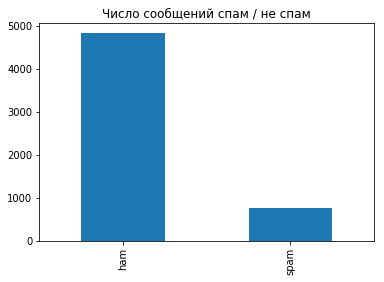

In [6]:
counts = data["label"].value_counts()
counts.plot(kind='bar', title="Число сообщений спам / не спам")

In [7]:
counts

ham     4825
spam     747
Name: label, dtype: int64

В выборке гораздо больше не-спама, чем спама.

### Предобработка данных

В данных пока что нет выделенных признаков. Для текстов можно использовать простое преобразование -- "мешок слов". Создадим словарь из всех слов, которые встречаются в sms. Для каждого объекта-текста мы получим столько признаков, сколько слов в словаре, и каждый признак содержит 1 (слово входит в текст) или 0 (слово не входит). Для этого в sklearn есть специальный инструмент:

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
vectorizer = CountVectorizer(max_features=10000)
X = vectorizer.fit_transform(data["sms"])

In [12]:
# слова в том порядке, в котором они идут в матрице X по столбцам
words = pd.Series(vectorizer.vocabulary_).sort_values().index

Index(['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236',
       '01223585334', '0125698789', '02',
       ...
       'zhong', 'zindgi', 'zoe', 'zogtorius', 'zoom', 'zouk', 'zyada', 'èn',
       'ú1', '〨ud'],
      dtype='object', length=8713)

Сколько получилось объектов и признаков?

In [37]:
X.shape

(5572, 8713)

А что в самой матрице?

In [45]:
X[:5].todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

Мы почти не видим единиц в этой матрице, потому что их очень мало.

У нас есть еще одна небольшая проблема: классы обозначены не числами, а буквами. Перекодируйте "spam" в 1, а "ham" в 0 с помощью средств pandas и запишите в переменную y:

In [47]:
### your code here

Теперь у нас есть X и y!

Разделите данные на обучение и контроль в пропорции 3:1:

In [2]:
from sklearn.model_selection import train_test_split

In [ ]:
### your code here


### Обучение линейной модели

Обучите логистическую регрессию:

In [3]:
from sklearn.linear_model import LogisticRegression

In [ ]:
### your code here


Создайте датафрейм pandas с двумя столбцами: первый столбец - слова из словаря (определены выше), второй - веса этих слов (атрибут coef\_ модели, например,  model.coef\_). Отсортируйте датафрейм по возрастанию весов, выведите 100 слов с наибольшими весами и 100 слов с наименьшими (наибольшими по модулю отрицательными) весами. 

Внимание: веса модели имеют форму (1, num\_features), а нам нужно (num\_features,), поэтому потребуется использовать конструкцию вида model.coef\_[0].

In [ ]:
### your code here


Можно ли сказать, что топ слова действительно характеризуют каждый из двух классов? Почему?

__Ваш комментарий:__

### Оценивание качества

Вычислите точность (accuracy) на обучающей и тестовой выборке:

In [1]:
from sklearn.metrics import accuracy_score

In [ ]:
### your code here


Поскольку в данных класс 1 редкий, лучше использовать точность и полноту. Посчитайте их для тестовой выборки:

In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
### your code here


Какое утверждение верно? Поясните свой ответ.

* Алгоритм находит почти все спамовые смс-сообщения, но иногда неверно включает в них неспамовые.
* Почти все, что алгоритм отнес к спамовым смс-сообщениям, действительно является спамом. Однако алгоритм находит не все спамовые сообщения.

__Ваш комментарий:__

Постройте ROC-кривую для вашей обученной модели. Используйте предсказания на тестовой выборке. 
1. Вместо функции predict нужно использовать функцию predict_proba. Она вернет матрицу размера (число объектов, 2), для каждого объекта - вероятность класса 0 и вероятность класса 1.
1. Вам нужно извлечь вектор вероятностей класса 1 и использовать его для построения ROC-кривой.

In [52]:
from sklearn.metrics import roc_curve

In [58]:
from matplotlib import pyplot as plt

In [ ]:
### your code here


### Подбор гиперпараметра - коэффициента регуляризации

В наших данных очень много признаков - столько, сколько слов с словаре. В линейных моделях есть специальный инструмент, позволяющий автоматически выбирать релевантные признаки - регуляризация, а точнее, Lasso (L1) регуляризация. При использовании регуляризации к функционалу качества, который оптимизируется при обучении линейной модели, прибавляется регуляризатор - сумма модулей весов, умноженная на коэффициент регуляризации. Коэффициент регуляризации задает силу регуляризатора: если коэффициент очень маленький, регуляризатор почти не меняет модель, если коэффициент очень большой, регуляризатор мешает модели настраиваться на данные. При достаточно большом коэффициенте Lasso-регуляризации большинство весов в модели становятся нулевыми, и соответствующие признаки не используются. Коэффициент регуляризации обычно подбирают, используя кросс-валидацию.

Сначала посмотрим, сколько нулевых весов в модели без регуляризации (та, которую вы уже обучили). Напомним, что веса модели хранятся в атрибуте coef\_ модели. Посчитайте с помощью numpy, каков процент весов, равных 0:

In [5]:
import numpy as np

In [ ]:
### your code here


Теперь обучите логистическую регрессию с коэффициентом Lasso-регуляризации по умолчанию. Для этого укажите penalty='l1' при создании объекта класса LogisticRegression:

In [4]:
### your code here


Какой процент нулевых весов в новой модели?

In [ ]:
### your code hre


Теперь подберем коэффициент регуляризации в помощью кросс-валидации. Для этого воспользуемся GridSearchCV:

In [6]:
from sklearn.model_selection import GridSearchCV

GridSearchCV имеет такой же интерфейс, как и классификатор, с фит-предикт. Но, в отличие от обычного классификатора, во время вызова fit обучается не одна модель, а несколько. Более подробно:
1. Для каждого варианта коэффициента регуляризации:
    1. Разделить выборку на несколько блоков
    2. Повторять несколько раз: выбрать один блок как тестовую выборку, все остальные - как обучающие. Обучить модель, вычислить качество на тестовом блоке.
    3. Усреднить качество по всем повторам с предыдущего шага.
2. Выбрать коэффициент регуляризации с лучшим средним качеством
3. Переобучить модель на всех обучающих данных с выбранным коэффициентом регуляризации.

В итоге, после вызова fit, в атрибуте .best\_estimator\_ будет храниться итоговая модель (с ней можно будет делать все то же самое, что с обычной логистической регрессией), а в атрибуте .grid\_scores\_ - история всех запусков.

Запишите в переменную model\_for\_cv модель логистической регрессии с выбранной регуляризацией "l1", а в переменную param\_grid - вектор коэффициентов регуляризации $1, 10, 100, \dots, 10^9$ (воспользуйтесь numpy).

In [ ]:
model_for_gs = ...
param_grid = ...
gs = GridSearchCV(model_for_gs, \
                   {"C":param_grid}, \
                   verbose=3)

Запустите обучение:

In [ ]:
### your code here


Построим график: коэффициент регуляризации - качество:

In [ ]:
cs = np.log10([elem[0]["C"] for elem in gs.grid_scores_])
quals = [elem[1] for elem in gs.grid_scores_]
plt.plot(cs, quals)

plt.xlabel("log10 of C")
plt.ylabel("accuracy")

Какое C оптимально? Что происходит при очень больших и маленьких С? Обратите внимание, что в логистической регрессии на самом деле коэффициент регуляризации равен $\frac 1 C$, то есть чем больше C, тем меньше коэффициент.

__Ваш комментарий:__

Какова доля нулевых весов в модели с лучшим C? 

In [ ]:
## your code here


Какое качество показывает модель с лучшим C на наших отложенных, тестовых данных?

In [ ]:
## your code here


Сравните неразреженную (без регуляризации) и разреженную (с оптимальным C) модели по качеству на тестовой выборке и доле нулевых весов.

__Ваш комментарий:__